# TASK 3: To Explore Unsupervised Learning¶


In [16]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
df = pd.read_csv("/Users/mayankverma/Desktop/Iris.csv")

# Exploratory Analysis of Data¶


In [20]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


# Data Analysis 

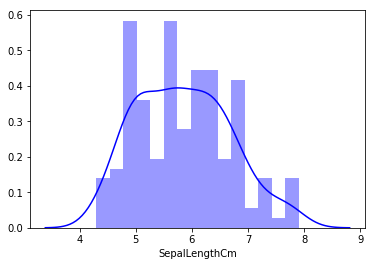

In [24]:
sns.distplot(df['SepalLengthCm'] , color="b", bins=15)

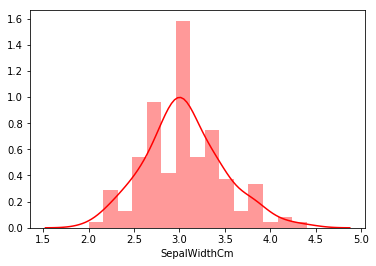

In [25]:
sns.distplot(df["SepalWidthCm"], color = "r", bins=15)


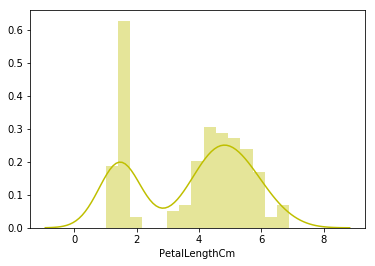

In [27]:
sns.distplot(df["PetalLengthCm"], color="y" ,bins=15)


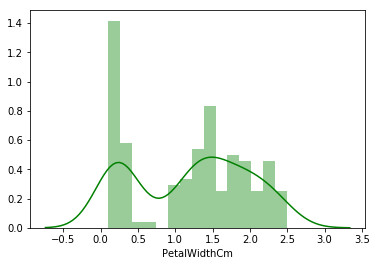

In [28]:
sns.distplot(df["PetalWidthCm"], color="g", bins=15)


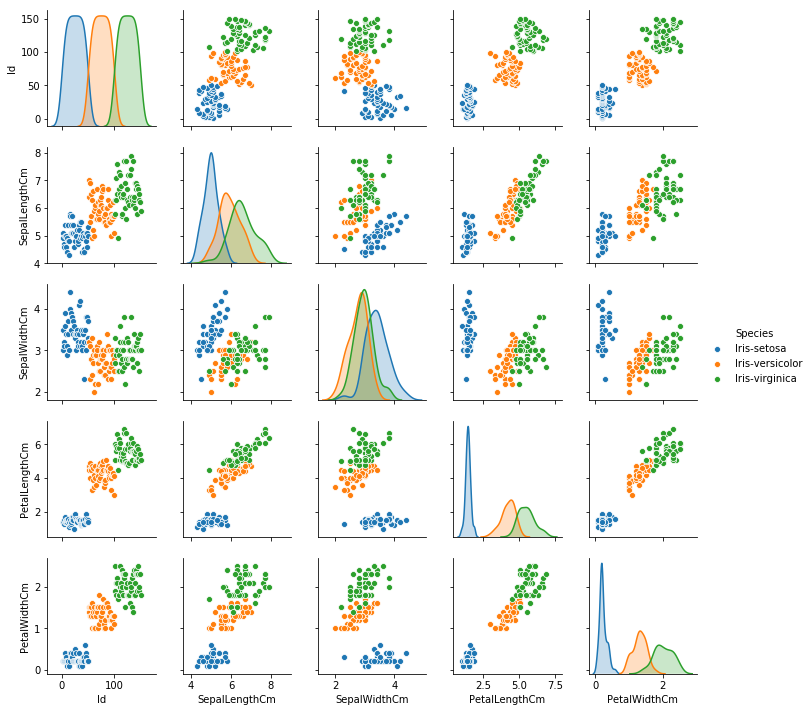

In [29]:
sns.pairplot(df, hue = "Species", height = 2)


In [30]:
# finding Correlation data 
corr = df.drop("Id",axis=1).corr(method = "kendall")
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.072112,0.717624,0.654960
SepalWidthCm,-0.072112,1.000000,-0.182391,-0.146988
PetalLengthCm,0.717624,-0.182391,1.000000,0.803014
PetalWidthCm,0.654960,-0.146988,0.803014,1.000000


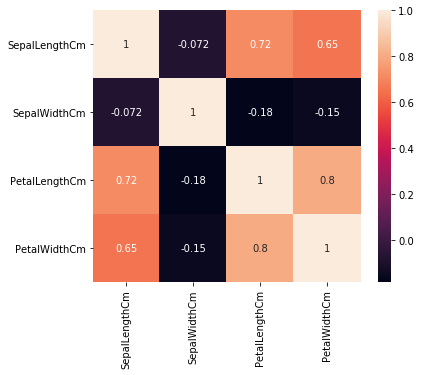

In [31]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True)

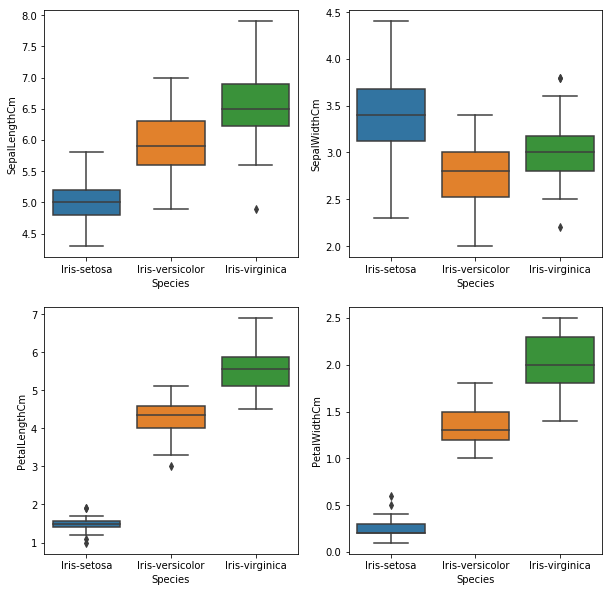

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.show()

# Model Training and Prediction¶


In [33]:
from sklearn.cluster import KMeans


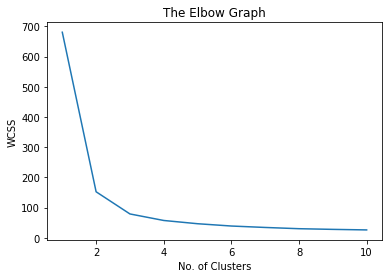

In [34]:
X = df.iloc[:,1:5].values
Ar = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i , init="k-means++", random_state = 0)
    kmean.fit(X)
    Ar.append(kmean.inertia_)
plt.plot(range(1,11),Ar)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Graph")
plt.show()

In [35]:
kmean = KMeans(n_clusters=3, init="k-means++", random_state = 0)
y = kmean.fit_predict(X)

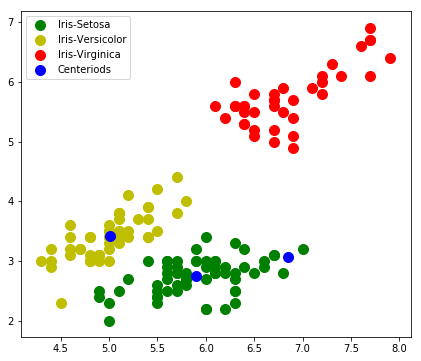

In [36]:
plt.figure(figsize=(7,6))
plt.scatter(X[y==0, 0] , X[y==0, 1] ,s=100, c="g", label="Iris-Setosa")
plt.scatter(X[y==1, 0] , X[y==1, 1] ,s=100, c="y" ,label="Iris-Versicolor")
plt.scatter(X[y==2, 0] , X[y==2, 2] ,s=100, c="r" ,label="Iris-Virginica")
plt.scatter(kmean.cluster_centers_[:,0] ,kmean.cluster_centers_[:,1], s=100, c ="b",label="Centeriods")
plt.legend()